In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
data = TabularDataset("/content/boston.csv")

Loaded data from: /content/boston.csv | Columns = 14 / 14 | Rows = 506 -> 506


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:

X = data.drop(columns=["MEDV"])
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])


In [ ]:

param_grid = {
    'lr__fit_intercept': [True, False],

}



In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__fit_intercept': [True, False]}, scoring='r2')

In [ ]:
best_model_lr = grid_search.best_estimator_



In [ ]:
y_pred_lr = best_model.predict(X_test)



In [ ]:


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


En iyi modelin hiperparametreleri: {'lr__fit_intercept': True}
Mean Squared Error: 21.51744423117721
R^2 Score: 0.7112260057484932


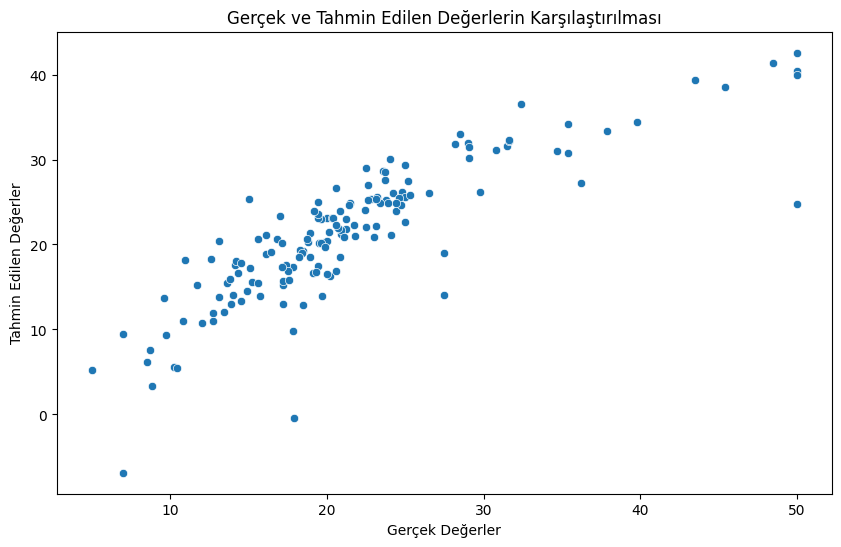

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"En iyi modelin hiperparametreleri: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()

In [ ]:
data_ag = TabularDataset(pd.concat([X_train, y_train], axis=1))

In [ ]:
test_data_ag = TabularDataset(pd.concat([X_test, y_test], axis=1))

In [ ]:
hyperparameters = {
    'GBM': {},
    'CAT': {},
    'NN_TORCH': {'num_epochs': 10, 'learning_rate': 1e-2},
    'RF': {},
    'XT': {},  # Extra Trees
    'KNN': {},  # K-Nearest Neighbors
    'LR': {}   # Logistic Regression
}


In [ ]:
predictor = TabularPredictor(label="MEDV", path='MEDV_predictors').fit(
    data_ag,
    hyperparameters=hyperparameters,
    num_bag_folds=5,
    num_stack_levels=2
)


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "MEDV_predictors"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
CPU Count:          2
Memory Avail:       11.11 GB / 12.67 GB (87.7%)
Disk Space Avail:   74.01 GB / 

In [ ]:
y_test_ag = test_data_ag["MEDV"]
test_data_without_target = test_data_ag.drop(columns=["MEDV"])
y_pred_ag = predictor.predict(test_data_without_target)

In [ ]:
mse_ag = mean_squared_error(y_test_ag, y_pred_ag)
r2_ag = r2_score(y_test_ag, y_pred_ag)

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'AutoGluon'],
    'Mean Squared Error (MSE)': [mse_lr, mse_ag],
    'R^2 Score': [r2_lr, r2_ag]
})


In [ ]:
print(results)


               Model  Mean Squared Error (MSE)  R^2 Score
0  Linear Regression                 21.517444   0.711226
1          AutoGluon                  8.479722   0.886198


Text(0.5, 1.0, 'Lineer Regresyon: Gerçek ve Tahmin Edilen Değerler')

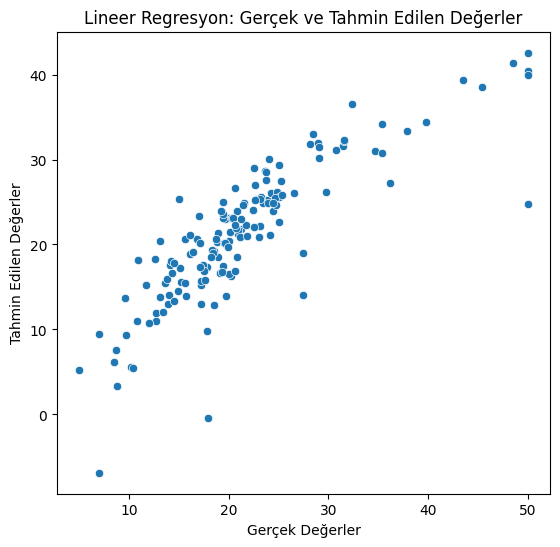

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Lineer Regresyon: Gerçek ve Tahmin Edilen Değerler')



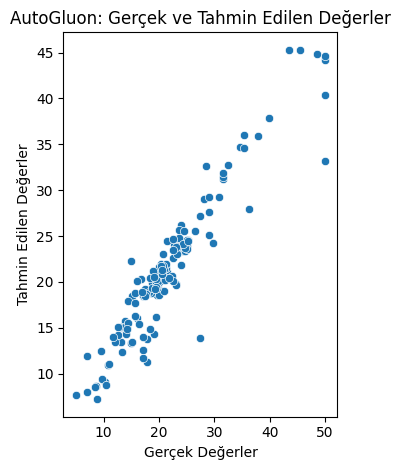

Model                     Linear Regression  AutoGluon
Mean Squared Error (MSE)          21.517444   8.479722
R^2 Score                          0.711226   0.886198


In [ ]:
# AutoGluon Modeli Sonuçları
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_ag, y=y_pred_ag)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('AutoGluon: Gerçek ve Tahmin Edilen Değerler')

plt.tight_layout()
plt.show()

results_transposed = results.set_index('Model').T
print(results_transposed)



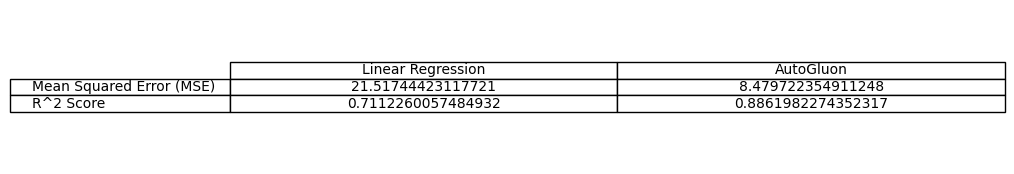

In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_transposed.values,
         colLabels=results_transposed.columns,
         rowLabels=results_transposed.index,
         cellLoc = 'center',
         loc='center')

plt.show()

In [ ]:
residuals_lr = y_test - y_pred_lr
residuals_ag = y_test_ag - y_pred_ag

residuals_df = pd.DataFrame({
    'Gerçek Değerler': y_test_ag,
    'Lineer Regresyon Artıkları': residuals_lr,
    'AutoGluon Artıkları': residuals_ag
})

print(residuals_df)



     Gerçek Değerler  Lineer Regresyon Artıkları  AutoGluon Artıkları
173             23.6                   -5.048960            -0.629166
274             32.4                   -4.095014            -0.384267
491             13.6                   -1.811193            -1.605680
72              22.8                   -2.603213            -1.328242
452             16.1                   -2.755280             0.000343
..               ...                         ...                  ...
441             17.1                   -0.303672             3.094922
23              14.5                    1.114059            -1.059281
225             50.0                   10.016575             9.583717
433             14.3                   -2.382863            -0.592872
447             12.6                   -5.685618            -2.435674

[152 rows x 3 columns]


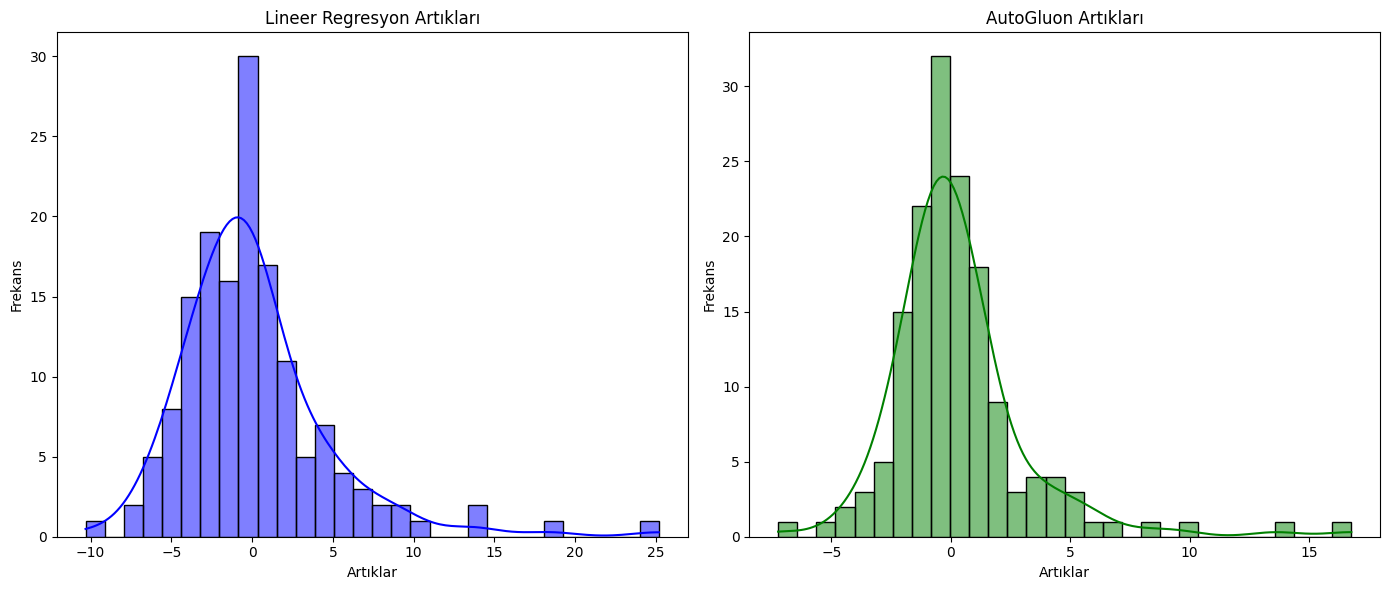

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, bins=30, kde=True, color='blue')
plt.title('Lineer Regresyon Artıkları')
plt.xlabel('Artıklar')
plt.ylabel('Frekans')

plt.subplot(1, 2, 2)
sns.histplot(residuals_ag, bins=30, kde=True, color='green')
plt.title('AutoGluon Artıkları')
plt.xlabel('Artıklar')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


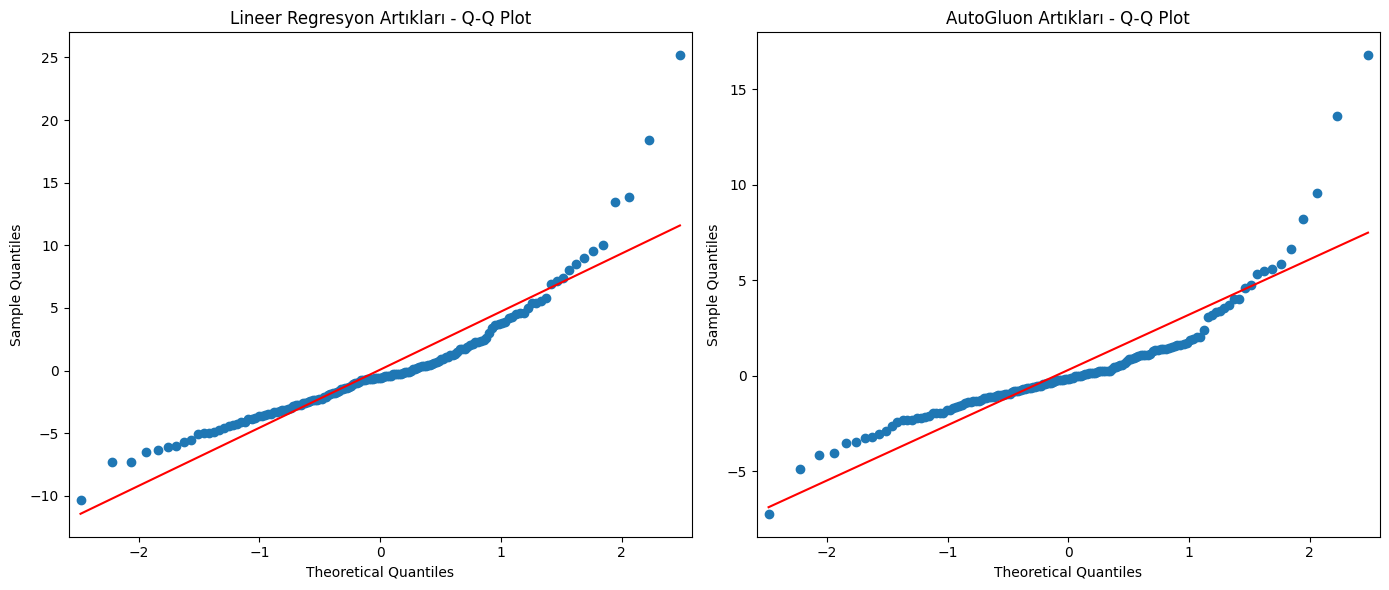

In [ ]:


# Artıkların Normal Dağılımı
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sm.qqplot(residuals_lr, line='s', ax=axes[0])
axes[0].set_title('Lineer Regresyon Artıkları - Q-Q Plot')

sm.qqplot(residuals_ag, line='s', ax=axes[1])
axes[1].set_title('AutoGluon Artıkları - Q-Q Plot')

plt.tight_layout()
plt.show()



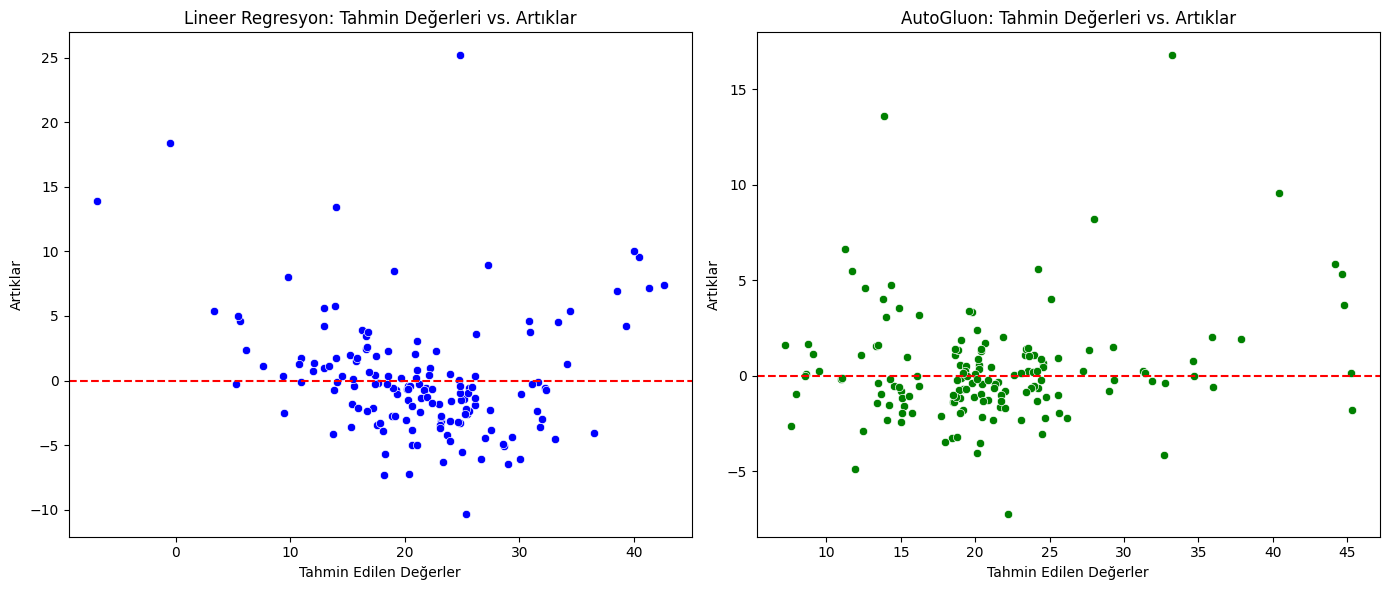

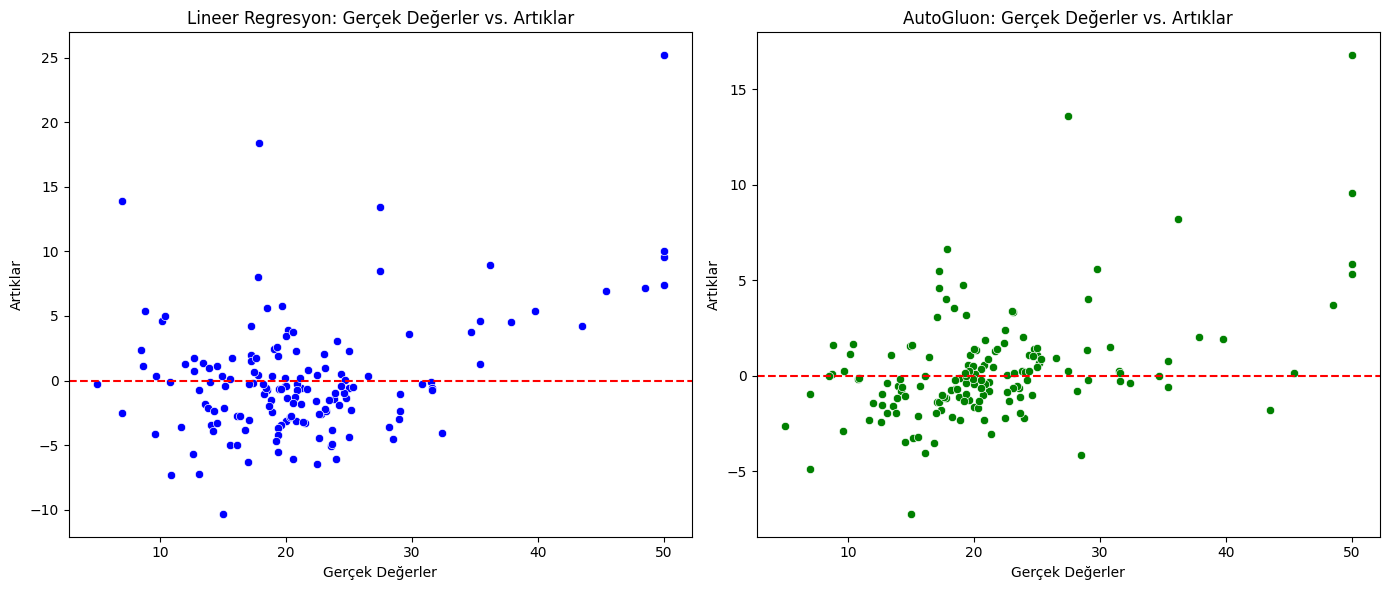

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Artıklar')
plt.title('Lineer Regresyon: Tahmin Değerleri vs. Artıklar')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_ag, y=residuals_ag, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Artıklar')
plt.title('AutoGluon: Tahmin Değerleri vs. Artıklar')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals_lr, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Artıklar')
plt.title('Lineer Regresyon: Gerçek Değerler vs. Artıklar')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_ag, y=residuals_ag, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Artıklar')
plt.title('AutoGluon: Gerçek Değerler vs. Artıklar')

plt.tight_layout()
plt.show()